<a href="https://colab.research.google.com/github/lovakumar12/decision_tree_streamlit/blob/main/Decision_tree_with_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
#!pip install pandas matplotlib seaborn scikit-learn imbalanced-learn streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import streamlit as st

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your file path or URL

# Display first few rows
print(data.head())

# Check dataset shape
print("Dataset Shape:", data.shape)

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check data types
print("Data Types:\n", data.dtypes)

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0          Yes  14.96     Yes             Yes     No               7   
1          Yes  36.93     Yes             Yes     No               3   
2           No  18.70     Yes              No    Yes              26   
3          Yes  31.43     Yes             Yes    Yes              24   
4          Yes  75.64      No              No    Yes               2   

   MentalHealth DiffWalking     Sex AgeCategory  \
0             6         Yes  Female       25-29   
1            10          No  Female       30-34   
2            15          No    Male       70-74   
3            20          No  Female       40-44   
4            29          No    Male       35-39   

                             Race                 Diabetic PhysicalActivity  \
0                           White                      Yes              Yes   
1                        Hispanic  No, borderline diabetes              Yes   
2                      

In [ ]:
data['Diabetic'].value_counts()

,count
Diabetic,
Yes (during pregnancy),25171
"No, borderline diabetes",25077
Yes,25001
No,24952


In [ ]:
# One-hot encode the 'Diabetic' column
data = pd.get_dummies(data, columns=['Diabetic'], drop_first=True)

# Display updated dataset
print(data.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0          Yes  14.96     Yes             Yes     No               7   
1          Yes  36.93     Yes             Yes     No               3   
2           No  18.70     Yes              No    Yes              26   
3          Yes  31.43     Yes             Yes    Yes              24   
4          Yes  75.64      No              No    Yes               2   

   MentalHealth DiffWalking     Sex AgeCategory  \
0             6         Yes  Female       25-29   
1            10          No  Female       30-34   
2            15          No    Male       70-74   
3            20          No  Female       40-44   
4            29          No    Male       35-39   

                             Race PhysicalActivity  GenHealth  SleepTime  \
0                           White              Yes       Fair       17.1   
1                        Hispanic              Yes       Poor        2.7   
2                        Hispani

In [ ]:
# Convert binary categorical variables (Yes/No) to 0/1
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode other categorical variables
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth'], drop_first=True)

# Display updated dataset
print(data.head())

  HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0          Yes  14.96        1                1       0               7   
1          Yes  36.93        1                1       0               3   
2           No  18.70        1                0       1              26   
3          Yes  31.43        1                1       1              24   
4          Yes  75.64        0                0       1               2   

   MentalHealth  DiffWalking  PhysicalActivity  SleepTime  ...  \
0             6            1                 1       17.1  ...   
1            10            0                 1        2.7  ...   
2            15            0                 0       15.6  ...   
3            20            0                 0        1.4  ...   
4            29            0                 1        8.8  ...   

   AgeCategory_80 or older  Race_Asian  Race_Black  Race_Hispanic  Race_Other  \
0                    False       False       False          False      

In [ ]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
PhysicalActivity,0
SleepTime,0


In [ ]:
# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})  # Convert target to binary

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())

Class Distribution After SMOTE:
 HeartDisease
1    50134
0    50134
Name: count, dtype: int64


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, criterion='gini',random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.50
Precision: 0.51
Recall: 0.62
F1-Score: 0.56
AUC-ROC: 0.50


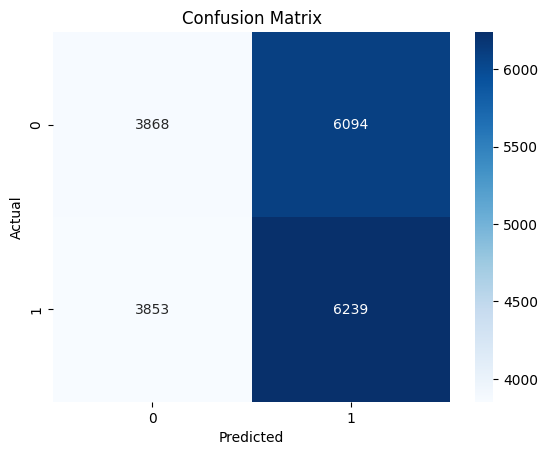

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
@12

SyntaxError: incomplete input (<ipython-input-15-3cf2cd59474f>, line 1)

In [ ]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 100))  # Adjust figure size for better visibility
plot_tree(clf, feature_names=data.columns, class_names=data['HeartDisease'], filled=True)
plt.show()

## stremlit app

In [4]:
!pip install streamlit

In [1]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")

# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])

# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native" else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")

Overwriting app.py


In [2]:
! wget -q -O - ipv4.icanhazip.com  ##for getting the code

35.185.145.126


In [ ]:
## run streamlit
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.145.126:8501

⠼⠴your url is: https://crazy-books-smoke.loca.lt
